<a href="https://colab.research.google.com/github/mobarakol/tutorial_notebooks/blob/main/figures_desam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import gdown
url = 'https://drive.google.com/uc?id=1u0giFt5rQ-zJy1aLIM9U0UADUf96El3a'
gdown.download(url,'pred_figs_18.zip',quiet=True)
!unzip -q pred_figs_18.zip -d pred_figs_18

url = 'https://drive.google.com/uc?id=1GywnVOXU9P_h5u5-XDlNrjbBiIcUi-4D'
gdown.download(url,'pred_figs_17.zip',quiet=True)
!unzip -q pred_figs_17.zip -d pred_figs_17


url = 'https://drive.google.com/uc?id=1OuOMMdres1ztBTm6Gt720UaaI6JtigvO'
gdown.download(url,'paper_fig_color.zip',quiet=True)
!unzip -q paper_fig_color.zip -d paper_fig_color

Prediction Visualization:

array([0, 1, 4, 6], dtype=uint8)

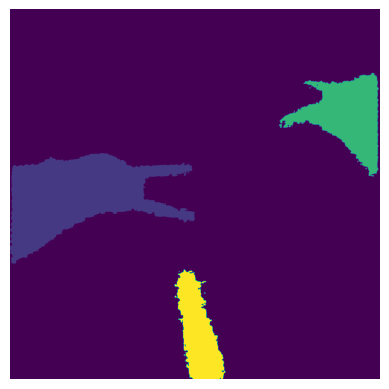

In [5]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

mask = cv2.imread('pred_figs_18/pred_seq5_frame029.png', 0)

plt.figure()
plt.axis('off')
plt.imshow(mask)
np.unique(mask)

GT Visualization:

array([0, 1, 4, 6], dtype=uint8)

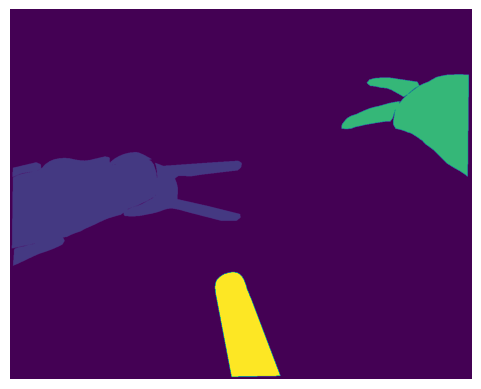

In [6]:
mask = cv2.imread('pred_figs_18/seq_5_frame029.png', 0)

plt.figure()
plt.axis('off')
plt.imshow(mask)
np.unique(mask)

Instrument to corresponding class pixel detection:

array([0, 4, 6], dtype=uint8)

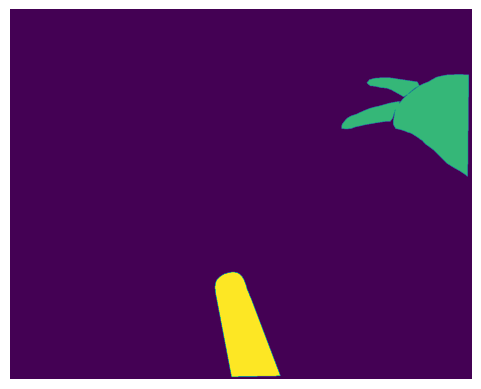

In [10]:
mask = cv2.imread('pred_figs_18/seq_5_frame029.png', 0)
mask[mask==1] = 0
plt.figure()
plt.axis('off')
plt.imshow(mask)
np.unique(mask)

Paper Images and RGB color code:

In [6]:
from PIL import Image
import numpy as np

cls1 = Image.open('/content/paper_fig_color/paper_fig/1.png').convert('RGB')
cls4 = Image.open('/content/paper_fig_color/paper_fig/4.png').convert('RGB')
cls6 = Image.open('/content/paper_fig_color/paper_fig/6.png').convert('RGB')
print('color code class1:', np.unique(np.array(cls1)))
print('color code class4:', np.unique(np.array(cls4)))
print('color code class6:', np.unique(np.array(cls6)))

color code class1: [ 73 154 218]
color code class4: [ 85  95 220]
color code class6: [ 45  79 207]


RGB color code from the website: https://imagecolorpicker.com/en

In [ ]:
color code class1: [ 105,223,162]
color code class4: [ 83,95,228]
color code class6: [ 226,4,76]

True

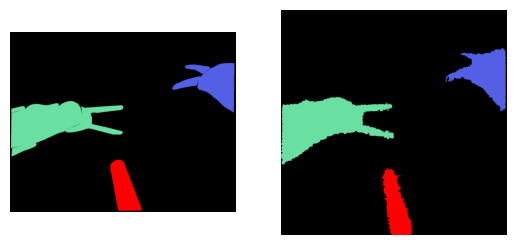

In [18]:
import cv2
import matplotlib.pyplot as plt

def mask2color(mask):
    colors = [(0, 0, 0),   # Background (black)
            (105,223,162), # Class 1
            (0, 255, 0), # Class 2
            (0, 0, 255), # Class 3
            (83,95,228), # Class 4
            (255, 0, 255), # Class 5
            (255, 0, 0), # Class 6 (red)
            (128, 128, 128)] # Class 7

    classes = np.unique(mask)
    r_mask = np.zeros((mask.shape[0], mask.shape[1]))
    g_mask = np.zeros((mask.shape[0], mask.shape[1]))
    b_mask = np.zeros((mask.shape[0], mask.shape[1]))

    for i, cls in enumerate(classes):
        if cls == 0:
            continue
        r_mask[mask==cls] = colors[cls][0];
        g_mask[mask==cls] = colors[cls][1];
        b_mask[mask==cls] = colors[cls][2]

    return np.array([r_mask,g_mask,b_mask]).transpose(1,2,0).astype(np.uint8)

gt = cv2.imread('pred_figs_18/seq_5_frame029.png', 0)
pred = cv2.imread('pred_figs_18/pred_seq5_frame029.png', 0)
gt =  mask2color(gt)
pred =  mask2color(pred)


plt.subplot(121), plt.axis('off'), plt.imshow(gt)
plt.subplot(122), plt.axis('off'), plt.imshow(pred)
gt_rgb = cv2.cvtColor(gt, cv2.COLOR_BGR2RGB)
pred_rgb = cv2.cvtColor(pred, cv2.COLOR_BGR2RGB)
cv2.imwrite('GT.png', gt_rgb)
cv2.imwrite('PRED.png', pred_rgb)